# Connect to G-Drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Change Notebook default Directory

In [10]:
import os
file_dir = '/content/drive/MyDrive/repeating DSP_2'
os.chdir(file_dir)

In [11]:
!ls

DSP_2.ipynb  ecommerce_dataset.csv  ecommerce_preprocessed.csv


# Import Library

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime , timedelta

# EDA

In [13]:
df = pd.read_csv('ecommerce_dataset.csv')
df.head()

<ipython-input-13-4f1109575f20>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ecommerce_dataset.csv')


,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [14]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Months'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          51303 non-null  object 
 1   Order Date        51303 non-null  object 
 2   Ship Date         51303 non-null  object 
 3   Aging             51302 non-null  float64
 4   Ship Mode         51303 non-null  object 
 5   Product Category  51303 non-null  object 
 6   Product           51303 non-null  object 
 7   Sales             51303 non-null  object 
 8   Quantity          51302 non-null  object 
 9   Discount          51303 non-null  object 
 10  Profit            51303 non-null  object 
 11  Shipping Cost     51303 non-null  object 
 12  Order Priority    51301 non-null  object 
 13  Customer ID       51302 non-null  object 
 14  Customer Name     51303 non-null  object 
 15  Segment           51302 non-null  object 
 16  City              51303 non-null  object

In [16]:
df.isna().sum()

Order ID            0
Order Date          0
Ship Date           0
Aging               1
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            1
Discount            0
Profit              0
Shipping Cost       0
Order Priority      2
Customer ID         1
Customer Name       0
Segment             1
City                0
State               0
Country             0
Region              1
Months              0
dtype: int64

In [17]:
df.isna().sum().loc[lambda x: x>0]

Aging             1
Quantity          1
Order Priority    2
Customer ID       1
Segment           1
Region            1
dtype: int64

In [18]:
cols_with_nan = [
    "Aging",
    "Quantity",
    "Order Priority",
    "Customer ID",
    "Segment",
    "Region"
]

In [19]:
numerical_cols = [
    "Aging",
    "Sales",
    "Quantity",
    "Discount",
    "Profit",
    "Shipping Cost"
]

In [20]:
df['Ship Mode'].unique()

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

In [21]:
df[numerical_cols].head()

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
0,8.0,$140.00,2,0.05,$46.00,$4.60
1,2.0,$211.00,3,0.03,$112.00,$11.20
2,8.0,$117.00,5,0.01,$31.20,$3.10
3,7.0,$118.00,2,0.05,$26.20,$2.60
4,9.0,$250.00,1,0.04,$160.00,$16.00


## Handling missing values

### Aging

Apa itu Aging?The time from the day the product is ordered to the day it is delivered.

- [link](https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset)


In [22]:
cols_with_nan

['Aging', 'Quantity', 'Order Priority', 'Customer ID', 'Segment', 'Region']

In [23]:
df.loc[df["Aging"].isna()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
27,AU-2015-28,2015-09-29,2015-10-05,NaN,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.03,...,$5.60,High,NG-0028,Harris Armstrong,Corporate,Jinan,Shandong,China,North Asia,Sep


In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df['Aging'] = (df['Ship Date'] - df['Order Date']).dt.days
index_to_fill = 27
df.at[index_to_fill, 'Aging'] = (df.at[index_to_fill, 'Ship Date'] - df.at[index_to_fill, 'Order Date']).total_seconds() / (24 * 3600)
df.loc[27]

Order ID                     AU-2015-28
Order Date          2015-09-29 00:00:00
Ship Date           2015-10-05 00:00:00
Aging                                 6
Ship Mode                   First Class
Product Category     Auto & Accessories
Product               Car Media Players
Sales                           $140.00
Quantity                              1
Discount                           0.03
Profit                           $55.80
Shipping Cost                     $5.60
Order Priority                     High
Customer ID                     NG-0028
Customer Name          Harris Armstrong
Segment                       Corporate
City                              Jinan
State                          Shandong
Country                           China
Region                       North Asia
Months                              Sep
Name: 27, dtype: object

In [25]:
df.loc[[27]]


,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
27,AU-2015-28,2015-09-29,2015-10-05,6,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.03,...,$5.60,High,NG-0028,Harris Armstrong,Corporate,Jinan,Shandong,China,North Asia,Sep


Handling missing value pada Aging yaitu dengan menghitung selisih Order Date dengan Ship Date

### Quantity

In [26]:
df[df['Quantity'].isna()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
95,AU-2015-96,2015-04-10,2015-04-15,5,First Class,Auto & Accessories,Bike Tyres,$72.00,NaN,0.01,...,$3.60,Critical,ON-0096,Stokes Knudson,Consumer,Tupã,São Paulo,Brazil,South,Apr


In [27]:
df[df.Product=="Bike Tyres"].head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
5,AU-2015-6,2015-02-25,2015-03-05,8,First Class,Auto & Accessories,Bike Tyres,$72.00,3,0.04,...,$2.40,Critical,TO-006,Carter Barreto,Corporate,Bytom,Silesia,Poland,EMEA,Feb
14,AU-2015-15,2015-10-12,2015-10-21,9,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.01,...,$1.80,Medium,EY-0015,Greene Decherney,Consumer,Brisbane,Queensland,Australia,Oceania,Oct
23,AU-2015-24,2015-11-22,2015-11-24,2,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.02,...,$1.80,Critical,CO-0024,Copeland Lomonaco,Corporate,Celle,Lower Saxony,Germany,Central,Nov
32,AU-2015-33,2015-08-24,2015-09-03,10,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.05,...,$1.80,High,KI-0033,Garner Hirasaki,Consumer,Suzhou,Anhui,China,North Asia,Aug
41,AU-2015-42,2015-02-25,2015-03-05,8,First Class,Auto & Accessories,Bike Tyres,$72.00,5,0.02,...,$1.40,Critical,IN-0042,Terrell Zeldin,Consumer,Zigong,Sichuan,China,North Asia,Feb


- Dari hal Diatas , kita dapat melihat pola untuk menghitung nilai sales dengan cara (Shipping cost * Quantity * 10)
- maka untuk mencari nilai quantity adalah sales/ Shipping Cost*10

In [28]:
#df.loc[df['Quantity'].isna(), 'Quantity'] = 2
df.loc[95, 'Quantity'] = 2

In [29]:
df.isna().sum().loc[lambda x: x>0]

Order Priority    2
Customer ID       1
Segment           1
Region            1
dtype: int64

In [30]:
df.loc[[95]]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
95,AU-2015-96,2015-04-10,2015-04-15,5,First Class,Auto & Accessories,Bike Tyres,$72.00,2,0.01,...,$3.60,Critical,ON-0096,Stokes Knudson,Consumer,Tupã,São Paulo,Brazil,South,Apr


### Order Priority

In [31]:
df.loc[df['Order Priority'].isna()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
625,AU-2015-626,2015-02-03,2015-02-05,2,First Class,Auto & Accessories,Tyre,$250.00,4,0.03,...,$14.00,NaN,TT-00626,Harper Dartt,Consumer,Coyoacán,Distrito Federal,Mexico,North,Feb
791,AU-2015-792,2015-04-27,2015-05-01,4,First Class,Auto & Accessories,Car Pillow & Neck Rest,$231.00,1,0.01,...,$14.90,NaN,IS-00792,Navarro Preis,Consumer,Ciudad del Carmen,Campeche,Mexico,North,Apr


In [32]:
df['Order Priority'].value_counts()

Medium      29446
High        15499
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

Kita Langsung isi saja dengan Mode yaitu Medium

In [33]:
df.loc[df['Order Priority'].isna(), 'Order Priority'] = 'Medium'

In [34]:
df.isna().sum().loc[lambda x: x>0]

Customer ID    1
Segment        1
Region         1
dtype: int64

### Segment

In [35]:
df.loc[df['Segment'].isna()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
131,AU-2015-132,2015-08-12,2015-08-15,3,First Class,Auto & Accessories,Bike Tyres,$72.00,5,0.05,...,$1.40,Critical,DT-00132,Rojas Schmidt,NaN,Los Angeles,California,United States,West,Aug


In [36]:
df['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9355
Name: Segment, dtype: int64

In [37]:
df.loc[131]

Order ID                    AU-2015-132
Order Date          2015-08-12 00:00:00
Ship Date           2015-08-15 00:00:00
Aging                                 3
Ship Mode                   First Class
Product Category     Auto & Accessories
Product                      Bike Tyres
Sales                            $72.00
Quantity                              5
Discount                           0.05
Profit                           $14.40
Shipping Cost                     $1.40
Order Priority                 Critical
Customer ID                    DT-00132
Customer Name             Rojas Schmidt
Segment                             NaN
City                        Los Angeles
State                        California
Country                   United States
Region                             West
Months                              Aug
Name: 131, dtype: object

In [38]:
df[(df['Customer Name'] =='Rojas Schmidt') & (df['City'] == 'Los Angeles')].head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
131,AU-2015-132,2015-08-12,2015-08-15,3,First Class,Auto & Accessories,Bike Tyres,$72.00,5,0.05,...,$1.40,Critical,DT-00132,Rojas Schmidt,NaN,Los Angeles,California,United States,West,Aug
3354,AU-2015-3355,2015-04-14,2015-04-21,7,First Class,Auto & Accessories,Car Mat,$54.00,1,0.01,...,$5.40,Critical,DT-003355,Rojas Schmidt,Home Office,Los Angeles,California,United States,West,Apr
21675,FA-2015-1161,2015-04-24,2015-04-27,3,Standard Class,Fashion,Casula Shoes,$122.00,2,0.03,...,$3.50,Medium,DT-0011367,Rojas Schmidt,Home Office,Los Angeles,California,United States,West,Apr
31298,FA-2015-10784,2015-08-27,2015-08-30,3,Standard Class,Fashion,Suits,$109.00,2,0.05,...,$1.80,Medium,DT-0020990,Rojas Schmidt,Home Office,Los Angeles,California,United States,West,Aug


Dari Pola nya kita dapat mengisi NaN nya dengan Home Office

In [39]:
df.loc[df['Segment'].isna(), 'Segment'] = 'Home Office'

In [40]:
df.loc[[131]]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
131,AU-2015-132,2015-08-12,2015-08-15,3,First Class,Auto & Accessories,Bike Tyres,$72.00,5,0.05,...,$1.40,Critical,DT-00132,Rojas Schmidt,Home Office,Los Angeles,California,United States,West,Aug


In [41]:
df.isna().sum().loc[lambda x: x>0]

Customer ID    1
Region         1
dtype: int64

### Region

In [42]:
df.loc[df['Region'].isna()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
117,AU-2015-118,2015-08-16,2015-08-17,1,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.04,...,$5.40,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug


In [43]:
df['Region'].value_counts()

Central           11117
South              6657
EMEA               5029
North              4784
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
4orth                 1
Name: Region, dtype: int64

In [44]:
df[(df['Country'] == 'Italy')].head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
117,AU-2015-118,2015-08-16,2015-08-17,1,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.04,...,$5.40,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug
142,AU-2015-143,2015-03-23,2015-03-26,3,First Class,Auto & Accessories,Car Seat Covers,$114.00,4,0.05,...,$1.10,Critical,EY-00143,Robertson Coakley,Consumer,Barletta,Apulia,Italy,South,Mar
204,AU-2015-205,2015-04-06,2015-04-16,10,First Class,Auto & Accessories,Car Mat,$54.00,2,0.04,...,$2.70,Critical,RF-00205,Mejia Waldorf,Corporate,Pozzuoli,Campania,Italy,South,Apr
221,AU-2015-222,2015-05-06,2015-05-07,1,First Class,Auto & Accessories,Bike Tyres,$72.00,3,0.02,...,$2.40,Medium,LD-00222,Obrien Geld,Corporate,Prato,Tuscany,Italy,South,May
238,AU-2015-239,2015-07-17,2015-07-21,4,First Class,Auto & Accessories,Tyre,$250.00,4,0.01,...,$16.00,Medium,ON-00239,Frost Tron,Consumer,Bologna,Emilia-Romagna,Italy,South,Jul


Dari Pola yang kita dapat , Region pada index 117 bisa kita isi dengan South

In [45]:
df.loc[117, 'Region'] = 'South'

In [46]:
df.loc[[117]]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
117,AU-2015-118,2015-08-16,2015-08-17,1,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.04,...,$5.40,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,South,Aug


In [47]:
df.isna().sum().loc[lambda x: x>0]

Customer ID    1
dtype: int64

### Customer ID

In [48]:
df.loc[df['Customer ID'].isna()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
370,AU-2015-371,2015-11-21,2015-11-25,4,First Class,Auto & Accessories,Car Speakers,$211.00,4,0.02,...,$11.40,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov


In [49]:
df['Customer ID'].nunique(), len(df)

(51289, 51303)

In [50]:
len(df[df['Customer Name'] == 'Herman Triggs'])

41

Dari data yang kita peroleh , Customer Name Herman Triggs yang Hanya dari Australia hanya ada 1 , Jadi saya mengisi NaN dengan GS-NaN menyesuaikan pola Customer ID Herman Triggs lainnya. Dan yang pasti dia tetap unique

In [51]:
df.loc[df['Customer ID'].isna(), 'Customer ID'] = 'GS-NaN'

In [52]:
df.isna().sum().loc[lambda x: x>0]

Series([], dtype: int64)

In [53]:
df.loc[[370]]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
370,AU-2015-371,2015-11-21,2015-11-25,4,First Class,Auto & Accessories,Car Speakers,$211.00,4,0.02,...,$11.40,Medium,GS-NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov


# Data Preprocessing

Data Preprocessing Step :
- Rename Columns
- Order date dan Ship Date ubah datetime datatype
- Penyesuaian Datatype
- Remove duplicate
- ["Sales","Profit","Shipping Cost"] , remove simbol dollar, ubah nama kolom dengan menambahkan "($)"

## Rename Columns

In [54]:
rename_mapper = {col: col.replace(" ", "_").lower() for col in df.columns}
rename_mapper

{'Order ID': 'order_id',
 'Order Date': 'order_date',
 'Ship Date': 'ship_date',
 'Aging': 'aging',
 'Ship Mode': 'ship_mode',
 'Product Category': 'product_category',
 'Product': 'product',
 'Sales': 'sales',
 'Quantity': 'quantity',
 'Discount': 'discount',
 'Profit': 'profit',
 'Shipping Cost': 'shipping_cost',
 'Order Priority': 'order_priority',
 'Customer ID': 'customer_id',
 'Customer Name': 'customer_name',
 'Segment': 'segment',
 'City': 'city',
 'State': 'state',
 'Country': 'country',
 'Region': 'region',
 'Months': 'months'}

In [55]:
df.rename(
    columns=rename_mapper,
    inplace=True
)
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          51303 non-null  object 
 1   Order Date        51303 non-null  object 
 2   Ship Date         51303 non-null  object 
 3   Aging             51302 non-null  float64
 4   Ship Mode         51303 non-null  object 
 5   Product Category  51303 non-null  object 
 6   Product           51303 non-null  object 
 7   Sales             51303 non-null  object 
 8   Quantity          51302 non-null  object 
 9   Discount          51303 non-null  object 
 10  Profit            51303 non-null  object 
 11  Shipping Cost     51303 non-null  object 
 12  Order Priority    51301 non-null  object 
 13  Customer ID       51302 non-null  object 
 14  Customer Name     51303 non-null  object 
 15  Segment           51302 non-null  object 
 16  City              51303 non-null  object

## Remove "$" in ["sales","profit","shipping_cost"]

In [7]:
df.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [56]:
dollar_cols = ['sales', 'profit', 'shipping_cost']

for col in dollar_cols:
  df[col] = (
      df[col].str.replace("[^\d.]","", regex=True)
  )
  df.rename(columns={col: col+"($)"}, inplace=True)
print("Formating & Renaming, Done!")

Formating & Renaming, Done!


In [57]:
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140.00,2,0.05,...,4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211.00,3,0.03,...,11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117.00,5,0.01,...,3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118.00,2,0.05,...,2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250.00,1,0.04,...,16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


## Remove Duplicates

In [58]:
df[df.duplicated(keep=False)]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
51294,FA-2015-30775,2016-01-02,2016-01-06,4,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51295,FA-2015-30775,2016-01-02,2016-01-06,4,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51296,FA-2015-30775,2016-01-02,2016-01-06,4,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51297,FA-2015-30775,2016-01-02,2016-01-06,4,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51298,FA-2015-30775,2016-01-02,2016-01-06,4,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51299,FA-2015-30775,2016-01-02,2016-01-06,4,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51300,FA-2015-30775,2016-01-02,2016-01-06,4,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51301,FA-2015-30775,2016-01-02,2016-01-06,4,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51302,FA-2015-30775,2016-01-02,2016-01-06,4,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [59]:
df = df.drop_duplicates(keep='last', ignore_index=True)

In [60]:
df[df.duplicated]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months


In [61]:
df.order_id.nunique(), len(df)

(51294, 51295)

In [62]:
df[df.order_id == "FA-2015-30775"]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
51289,FA-2015-30775,2015-12-01,2015-12-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Dec
51294,FA-2015-30775,2016-01-02,2016-01-06,4,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [63]:
df.drop(labels=51289, axis=0, inplace=True)

In [64]:
df.order_id.nunique(), len(df)

(51294, 51294)

## Datatype Disesuaikan

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51294 entries, 0 to 51294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51294 non-null  object        
 1   order_date        51294 non-null  datetime64[ns]
 2   ship_date         51294 non-null  datetime64[ns]
 3   aging             51294 non-null  int64         
 4   ship_mode         51294 non-null  object        
 5   product_category  51294 non-null  object        
 6   product           51294 non-null  object        
 7   sales($)          51294 non-null  object        
 8   quantity          51294 non-null  object        
 9   discount          51294 non-null  object        
 10  profit($)         51294 non-null  object        
 11  shipping_cost($)  51294 non-null  object        
 12  order_priority    51294 non-null  object        
 13  customer_id       51294 non-null  object        
 14  customer_name     5129

In [66]:
df[df.quantity=='abc']

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
321,AU-2015-322,2015-04-21,2015-04-24,3,First Class,Auto & Accessories,Car Mat,54.00,abc,0.02,...,5.40,Critical,CH-00322,May Französisch,Consumer,Casablanca,Grand Casablanca,Morocco,Africa,Apr


In [67]:
dtype_mapper = {
    'sales($)' : 'float',
    'quantity' : 'int32',
    'discount' : 'float',
    'profit($)' : 'float',
    'shipping_cost($)' : 'float'
}
df = df.astype(dtype_mapper)

ValueError: ignored

In [68]:
df.quantity.value_counts()

4      6631
3      6564
5      6547
1      6542
2      6482
1      3756
3      3747
2      3728
5      3649
4      3647
abc       1
Name: quantity, dtype: int64

In [69]:
df['quantity'].value_counts()

4      6631
3      6564
5      6547
1      6542
2      6482
1      3756
3      3747
2      3728
5      3649
4      3647
abc       1
Name: quantity, dtype: int64

In [70]:
df[df['product']=='Car Mat'].head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
6,AU-2015-7,2015-04-09,2015-04-10,1,First Class,Auto & Accessories,Car Mat,54.00,1,0.05,...,5.40,High,OM-007,Mcconnell Tom,Consumer,Chicago,Illinois,United States,Central,Apr
15,AU-2015-16,2015-02-23,2015-03-05,10,First Class,Auto & Accessories,Car Mat,54.00,2,0.01,...,2.70,Critical,RN-0016,Bentley Zypern,Consumer,Berlin,Berlin,Germany,Central,Feb
24,AU-2015-25,2015-02-22,2015-03-02,8,First Class,Auto & Accessories,Car Mat,54.00,1,0.05,...,5.40,High,NA-0025,Vasquez Dona,Consumer,Seville,Andalusía,Spain,South,Feb
33,AU-2015-34,2015-05-04,2015-05-09,5,First Class,Auto & Accessories,Car Mat,54.00,4,0.05,...,1.40,Critical,EE-0034,Norton Magee,Corporate,Henderson,Nevada,United States,West,May
42,AU-2015-43,2015-10-26,2015-10-27,1,First Class,Auto & Accessories,Car Mat,54.00,5,0.01,...,1.10,High,EN-0043,Reyes Christensen,Consumer,Adelaide,South Australia,Australia,Oceania,Oct


In [71]:
df.loc[df.quantity=='abc', 'quantity'] = '1'

In [73]:
dtype_mapper = {
    'sales($)' : 'float',
    'quantity' : 'int32',
    'discount' : 'float',
    'profit($)' : 'float',
    'shipping_cost($)' : 'float'
}
df = df.astype(dtype_mapper)

ValueError: ignored

In [72]:
df.loc[df['discount'] == 'xxx']

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
211,AU-2015-212,2015-09-02,2015-09-08,6,First Class,Auto & Accessories,Tyre,250.00,5,xxx,...,13.30,Medium,EE-00212,Norton Magee,Corporate,Bondy,Ile-de-France,France,Central,Sep


In [74]:
my_mask = (
    (df['product'] == 'Tyre') & \
    (df['ship_mode'] == 'First Class') & \
    (df['product_category'] == 'Auto & Accessories') & \
    (df['quantity'] == '5') & \
    (df['country'] == 'France')
)
df.loc[my_mask]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
211,AU-2015-212,2015-09-02,2015-09-08,6,First Class,Auto & Accessories,Tyre,250.00,5,xxx,...,13.30,Medium,EE-00212,Norton Magee,Corporate,Bondy,Ile-de-France,France,Central,Sep
409,AU-2015-410,2015-07-07,2015-07-10,3,First Class,Auto & Accessories,Tyre,250.00,5,0.04,...,12.00,Critical,WN-00410,Butler Brown,Corporate,Saint-Brieuc,Brittany,France,Central,Jul
508,AU-2015-509,2015-06-12,2015-06-21,9,First Class,Auto & Accessories,Tyre,250.00,5,0.05,...,10.80,High,EZ-00509,Schmidt Dominguez,Consumer,Grigny,Ile-de-France,France,Central,Jun
3379,AU-2015-3380,2015-08-23,2015-08-25,2,First Class,Auto & Accessories,Tyre,250.00,5,0.04,...,12.00,High,UM-003380,Hood Mitchum,Home Office,Lunel,Languedoc-Roussillon,France,Central,Aug
3667,AU-2015-3668,2015-09-23,2015-10-01,8,First Class,Auto & Accessories,Tyre,250.00,5,0.03,...,13.30,High,IO-003668,Walter Seio,Consumer,Castres,Midi-Pyrénées,France,Central,Sep
4297,AU-2015-4298,2015-12-12,2015-12-17,5,First Class,Auto & Accessories,Tyre,250.00,5,0.01,...,15.80,Medium,UN-004298,Bennett Braun,Consumer,Lille,Nord-Pas-de-Calais,France,Central,Dec


In [75]:
df.loc[df.discount == 'xxx', 'discount'] = '0.03'

In [76]:
df[['sales($)', 'quantity', 'discount', 'profit($)', 'shipping_cost($)']]

,sales($),quantity,discount,profit($),shipping_cost($)
0,140.00,2,0.05,46.00,4.60
1,211.00,3,0.03,112.00,11.20
2,117.00,5,0.01,31.20,3.10
3,118.00,2,0.05,26.20,2.60
4,250.00,1,0.04,160.00,16.00
...,...,...,...,...,...
51290,85.00,3,0.03,28.30,2.80
51291,85.00,3,0.03,28.30,2.80
51292,85.00,3,0.03,28.30,2.80
51293,85.00,3,0.03,28.30,2.80


In [77]:
dtype_mapper = {
    'sales($)' : 'float',
    'quantity' : 'int32',
    'discount' : 'float',
    'profit($)' : 'float',
    'shipping_cost($)' : 'float'
}
df = df.astype(dtype_mapper)

ValueError: ignored

In [78]:
df.loc[df['shipping_cost($)'] == '']

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
535,AU-2015-536,2015-03-21,2015-03-24,3,First Class,Auto & Accessories,Tyre,250.00,4,0.02,...,,Critical,ON-00536,Webster Jordon,Consumer,Guiyang,Guizhou,China,North Asia,Mar


Pola nya nilai dari shipping_cost adalah 10% dari nilai profit

In [79]:
df.loc[df['shipping_cost($)'] == '', 'shipping_cost($)'] = 15

In [80]:
dtype_mapper = {
    'sales($)' : 'float',
    'quantity' : 'int32',
    'discount' : 'float',
    'profit($)' : 'float',
    'shipping_cost($)' : 'float'
}
df = df.astype(dtype_mapper)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51294 entries, 0 to 51294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51294 non-null  object        
 1   order_date        51294 non-null  datetime64[ns]
 2   ship_date         51294 non-null  datetime64[ns]
 3   aging             51294 non-null  int64         
 4   ship_mode         51294 non-null  object        
 5   product_category  51294 non-null  object        
 6   product           51294 non-null  object        
 7   sales($)          51294 non-null  float64       
 8   quantity          51294 non-null  int32         
 9   discount          51294 non-null  float64       
 10  profit($)         51294 non-null  float64       
 11  shipping_cost($)  51294 non-null  float64       
 12  order_priority    51294 non-null  object        
 13  customer_id       51294 non-null  object        
 14  customer_name     5129

In [ ]:
df['aging'] = df['aging'].astype('int32')

In [ ]:
df.info()

# Save Cleaned and Preprocessed Dataset

In [82]:
df.to_csv('ecommerce_preprocessed.csv', index=False)

In [83]:
df = pd.read_csv('ecommerce_preprocessed.csv')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51294 entries, 0 to 51293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          51294 non-null  object 
 1   order_date        51294 non-null  object 
 2   ship_date         51294 non-null  object 
 3   aging             51294 non-null  int64  
 4   ship_mode         51294 non-null  object 
 5   product_category  51294 non-null  object 
 6   product           51294 non-null  object 
 7   sales($)          51294 non-null  float64
 8   quantity          51294 non-null  int64  
 9   discount          51294 non-null  float64
 10  profit($)         51294 non-null  float64
 11  shipping_cost($)  51294 non-null  float64
 12  order_priority    51294 non-null  object 
 13  customer_id       51294 non-null  object 
 14  customer_name     51294 non-null  object 
 15  segment           51294 non-null  object 
 16  city              51294 non-null  object

# Visualization

## Ship Mode Distribution

In [85]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'aging', 'ship_mode',
       'product_category', 'product', 'sales($)', 'quantity', 'discount',
       'profit($)', 'shipping_cost($)', 'order_priority', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'country', 'region',
       'months'],
      dtype='object')

In [86]:
df.ship_mode.value_counts()

Standard Class    30779
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

In [87]:
list(df.ship_mode.value_counts().index), list(df.ship_mode.value_counts().values)

(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
 [30779, 10309, 7505, 2701])

In [88]:
ship_mode = list(df.ship_mode.value_counts().index)

In [89]:
ship_mode_counts = list(df.ship_mode.value_counts().values)

<function matplotlib.pyplot.show(close=None, block=None)>

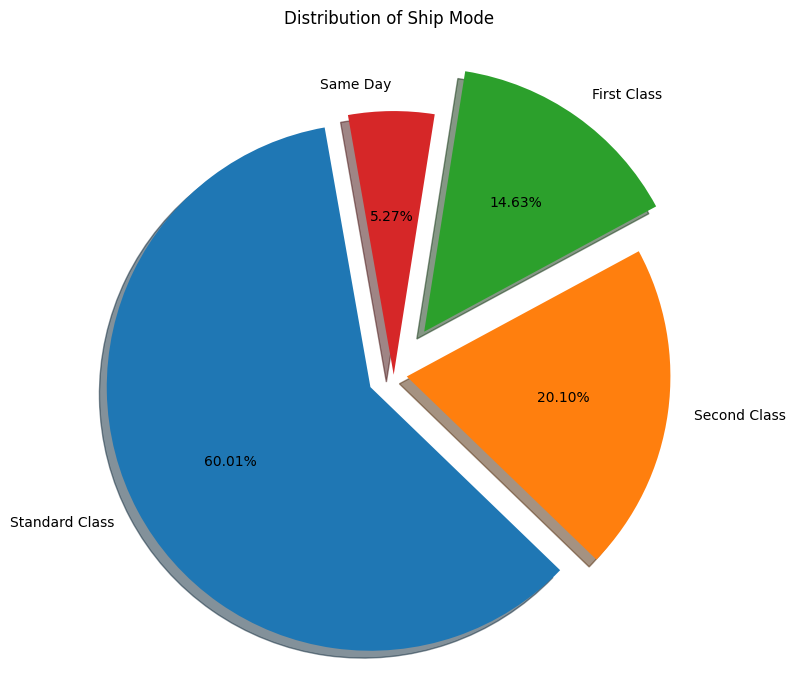

In [90]:
explode = (0.1, 0.05, 0.2, 0)
plt.figure(figsize=(8, 8))
plt.pie(
    ship_mode_counts,
    labels=ship_mode,
    explode=explode,
    autopct='%1.2f%%',
    startangle=100,
    shadow=True
)
plt.title('Distribution of Ship Mode\n')
plt.axis('equal')
plt.show

In [93]:
pivot_df = df.pivot_table(index='segment', columns='product_category', values='sales($)', aggfunc='mean')
pivot_df

product_category,Auto & Accessories,Electronic,Fashion,Home & Furniture
segment,,,,
Consumer,145.614599,146.942059,168.753338,127.411071
Corporate,145.928285,143.520604,170.034673,129.858349
Home Office,148.137854,147.610672,169.907529,126.386192


## Average Sales Distribution by Segment and Product Category

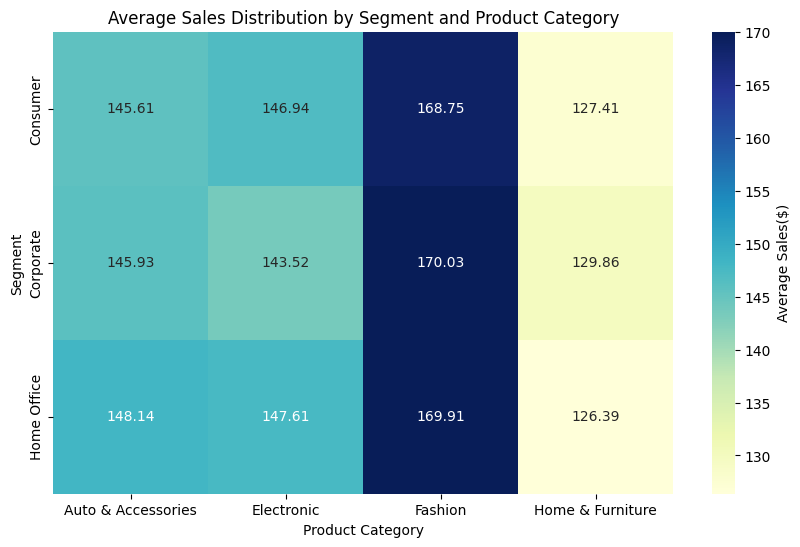

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table
pivot_df = df.pivot_table(index='segment', columns='product_category', values='sales($)', aggfunc='mean')

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Average Sales($)'})
plt.title('Average Sales Distribution by Segment and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Segment')
plt.show()


In [101]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [ ]:
df.info()

## Monthly Sales Trends

In [102]:
monthly_sum_sales = df.groupby('months').agg({'sales($)' : 'sum'})
monthly_sum_sales

,sales($)
months,
Apr,659404.0
Aug,670788.0
Dec,693073.0
Feb,610240.0
Jan,676653.0
Jul,685152.0
Jun,664560.0
Mar,686681.0
May,672547.0


In [103]:
ordered_months = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]
Month_CI = pd.CategoricalIndex(
    monthly_sum_sales.index,
    ordered=True,
    categories=ordered_months
)
Month_CI

CategoricalIndex(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
                  'May', 'Nov', 'Oct', 'Sep'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True, dtype='category', name='months')

In [104]:
monthly_sum_sales.index = Month_CI
monthly_sum_sales = monthly_sum_sales.sort_index()
monthly_sum_sales

,sales($)
months,
Jan,676653.0
Feb,610240.0
Mar,686681.0
Apr,659404.0
May,672547.0
Jun,664560.0
Jul,685152.0
Aug,670788.0
Sep,658844.0


In [105]:
import matplotlib.ticker as ticker

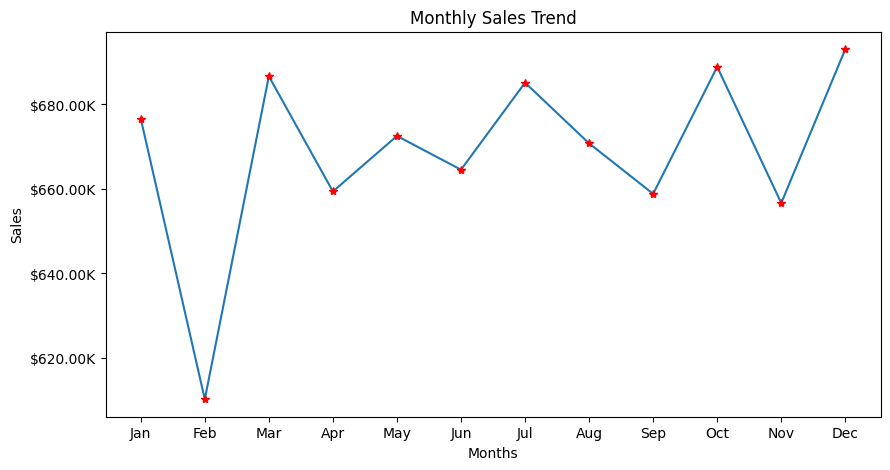

In [106]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    monthly_sum_sales.index,
    monthly_sum_sales['sales($)'],
    marker ='*',
    mfc='red',
    mec='red',
    linestyle='-'
)

ax.set_title('Monthly Sales Trend')
ax.set_xlabel('Months')
ax.set_ylabel('Sales')
ax.grid=(True)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.2f}K'.format(x/1000)))
fig.show()

In [ ]:
df.info()

In [ ]:
df['product_category'].value_counts()

In [ ]:
df['product'].value_counts()

In [ ]:
df['segment'].value_counts()

In [ ]:
df['region'].value_counts()

## Product Category Distribution

In [96]:
df['product_category'].value_counts()

Fashion               30779
Home & Furniture      10309
Auto & Accessories     7505
Electronic             2701
Name: product_category, dtype: int64

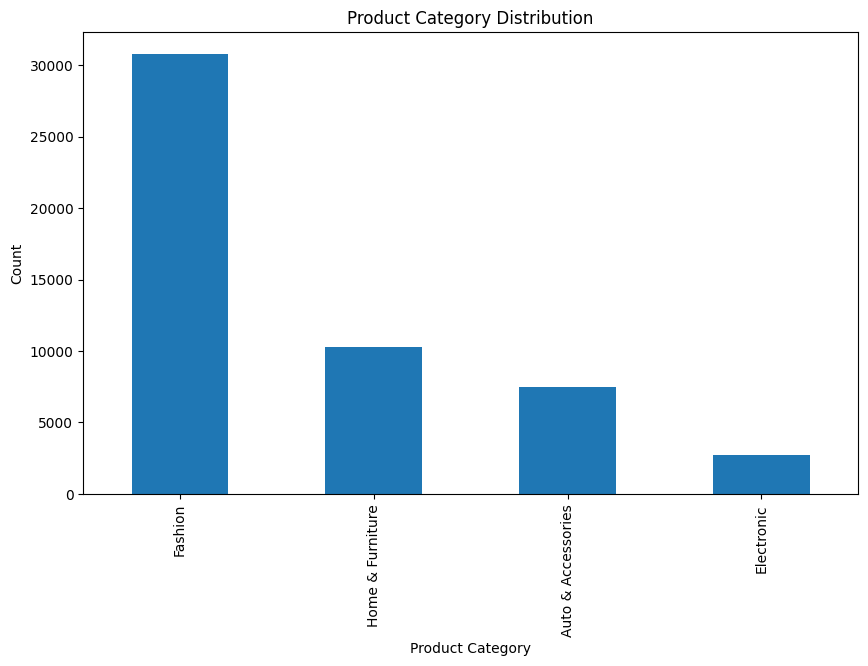

In [95]:
# Create a bar chart for Product Category Distribution
plt.figure(figsize=(10, 6))
df['product_category'].value_counts().plot(kind='bar')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

## Segment Distribution

In [92]:
df['segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9347
Name: segment, dtype: int64

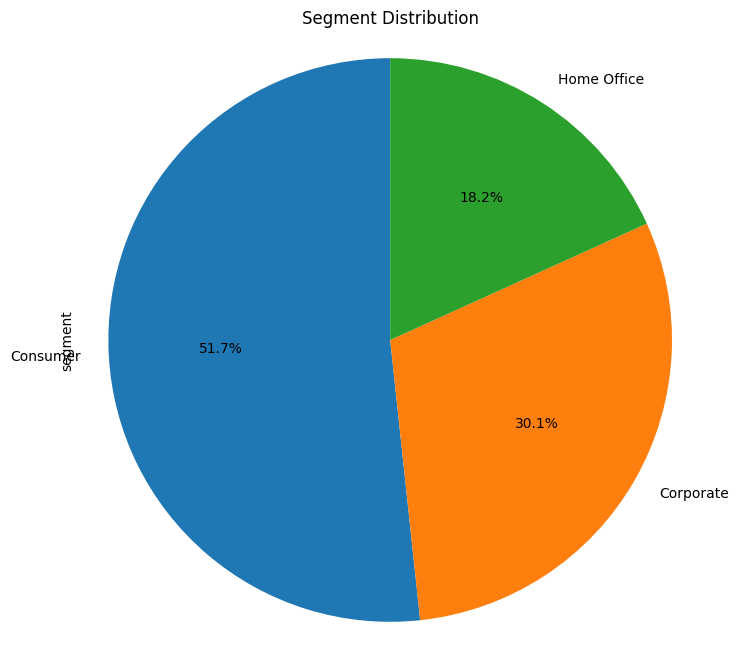

In [91]:
# Create a pie chart for Segment Distribution
plt.figure(figsize=(8, 8))
df['segment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Segment Distribution')
plt.axis('equal')
plt.show()

## Region Distribution

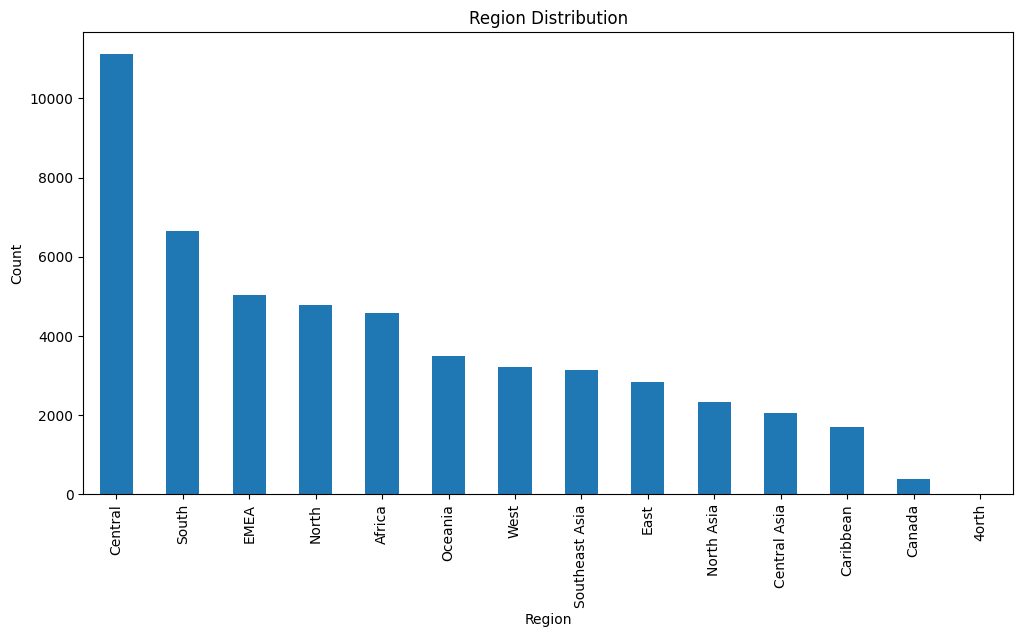

In [97]:
# Create a bar chart for Region Distribution
plt.figure(figsize=(12, 6))
df['region'].value_counts().plot(kind='bar')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


## Sales By Product Category

In [100]:
sales_by_product = df.groupby('product_category')['sales($)'].sum().sort_values()
sales_by_product

product_category
Electronic             394738.0
Auto & Accessories    1096928.0
Home & Furniture      1319407.0
Fashion               5212437.0
Name: sales($), dtype: float64

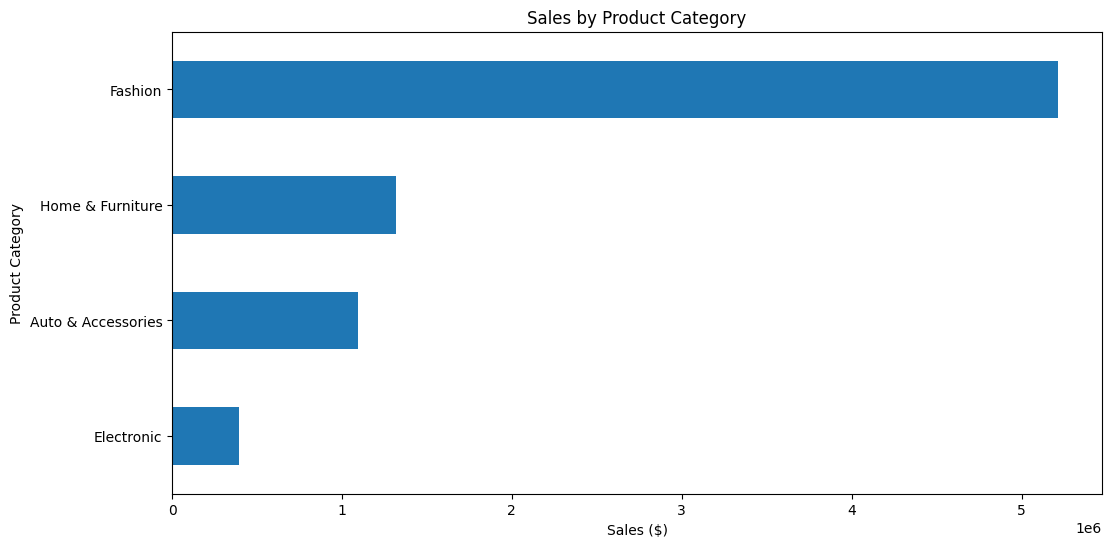

In [98]:
# Create a grouped bar chart for Sales by Product Category
plt.figure(figsize=(12, 6))
df.groupby('product_category')['sales($)'].sum().sort_values().plot(kind='barh')
plt.title('Sales by Product Category')
plt.xlabel('Sales ($)')
plt.ylabel('Product Category')
plt.show()